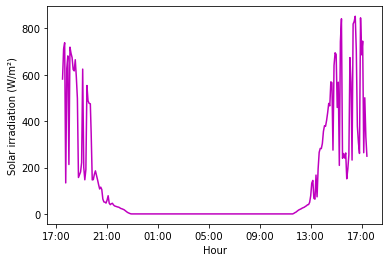

In [8]:
##########
##### Code to look at the data from the weather station in my (Elizabeth's) back yard
##### real-time data available here, if you're interested:
##### https://www.wunderground.com/dashboard/pws/KFLGAINE140
##########

### import necessary libraries
# if the ambient_api is not alreayd installed, run this command:
# pip install ambient_api
from ambient_api.ambientapi import AmbientAPI
import time
import pandas
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# this connects with devices associated with my API key
# application key is for each developer, API key gives access to my weather station
api = AmbientAPI(AMBIENT_ENDPOINT = 'https://api.ambientweather.net/v1/',
                AMBIENT_API_KEY = '9b0df062404a403fa4ab650b4019fe9efa75da55fb4f49f99d1c0b08a7825b69',
                AMBIENT_APPLICATION_KEY = '6461626a535b439a93d828840b0a392aea18784125504f729e8e6e83b7dcaef4')

devices = api.get_devices()

device = devices[0] #get the first (and only) device associated with my API key

time.sleep(1) #pause for a second to avoid API limits

data = device.get_data()

df = pandas.DataFrame(data)

#convert UTC time to local time
df['localtime']=pandas.to_datetime(df['dateutc'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

#set up plot to look at the solar irradiation over the last 24 hrs
plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.plot(df['localtime'],df['solarradiation'], color='m')
plt.ylabel('Solar irradiation (W/m\u00b2)')
plt.xlabel('Hour')
plt.show()

In [ ]:
#### PS4 Name:Moni Qiande

import urllib.request
import json
from PIL import Image
import requests
import matplotlib.pyplot as plt

user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

url = 'https://dog.ceo/api/breeds/image/random'
headers = {'User-Agent':user_agent,} 

request = urllib.request.Request(url,None,headers) #The assembled request
response = urllib.request.urlopen(request)
data = response.read() # The data u need

try:
    js = json.loads(data)
except:
    js = None


for key in js.keys():
    if key == "message":
        msg = js[key]
        print(js[key])

        
# show the image
response = requests.get(msg, stream=True)
img = Image.open(response.raw)

plt.imshow(img)
plt.axis('off')
plt.show()


# download the image
from urllib.request import urlretrieve
urlretrieve(msg, '.image1.png')

#test